# Car Price Prediction

In [1]:
# import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#import dataset
df = pd.read_csv("CarPrice_Assignment.csv")
df.head(4)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [4]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [5]:
#data cleaning
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [6]:
df.shape

(205, 26)

In [7]:
df.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [8]:
# Data Cleaing and preparation

In [9]:
# extract company name and drop the car name an correct the company name
CompanyName = df['CarName'].apply(lambda X : X.split(" ")[0])
df.insert(3,"CompanyName",CompanyName)
df.drop(['CarName'],axis=1,inplace=True)
df.head()

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [10]:
df['CompanyName'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [11]:
df['CompanyName'] = df["CompanyName"].str.lower()

In [12]:
def change(incorrect,correct):
    df["CompanyName"].replace(incorrect,correct,inplace=True)

change('vokswagen','volkswagen')
change('vw','volkswagen')
change('maxda','mazda')
change('porcshce','porsche')
change('toyouta','toyota')

df["CompanyName"].unique()


array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [13]:
#check duplicated value
df.loc[df.duplicated()]

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price


In [14]:
# Data Visaulisation

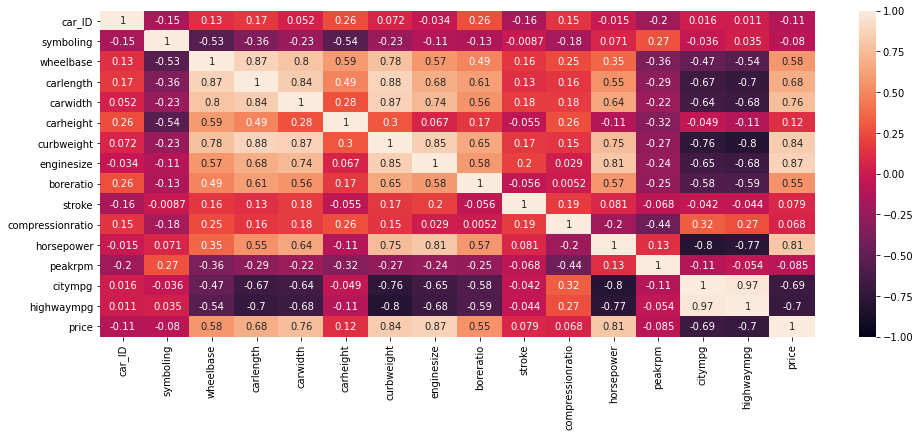

In [15]:
plt.figure(figsize=(16,6))
corr = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)

<AxesSubplot:title={'center':'Car Price Spread'}, ylabel='price'>

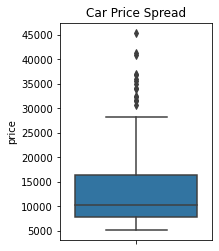

In [16]:
plt.subplot(1,2,1)
plt.title("Car Price Spread")
sns.boxplot(y=df.price)

<AxesSubplot:title={'center':'Car Price Spread'}, xlabel='price', ylabel='Density'>

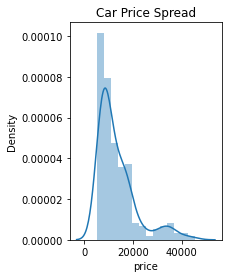

In [17]:
plt.subplot(1,2,1)
plt.title("Car Price Spread")
sns.distplot(df.price)

1. Above plot is right skewed, it means most car prices are low (15000) in the datasets
2. The data points are far spread out from the mean, which indicates a high variance in the car prices.(85% of the prices are below 18000, whereas the remaining 15% are between 18000 and 45,000.)

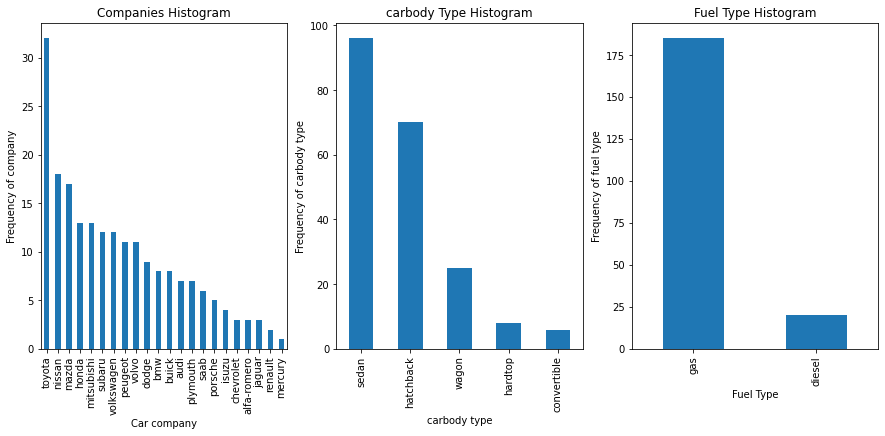

In [18]:
plt.figure(figsize=(15,6))
plt.subplot(1,3,1)
plt1 = df["CompanyName"].value_counts().plot.bar()
plt.title('Companies Histogram')
plt1.set(xlabel = 'Car company', ylabel='Frequency of company')

plt.subplot(1,3,2)
plt1 = df["carbody"].value_counts().plot.bar()
plt.title('carbody Type Histogram')
plt1.set(xlabel = 'carbody type', ylabel='Frequency of carbody type')

plt.subplot(1,3,3)
plt1 = df["fueltype"].value_counts().plot.bar()
plt.title('Fuel Type Histogram')
plt1.set(xlabel = 'Fuel Type', ylabel='Frequency of fuel type')
plt.show()


1. Toyota is most favourite car company
2. sedan is most popular carbody type
3. gas fueled cars is more popular than diesel

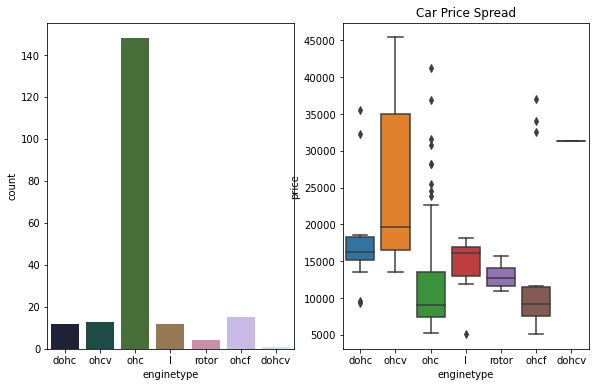

In [19]:
plt.figure(figsize=(15,6))
plt.subplot(1,3,1)
# plt1 = df["enginetype"].value_counts().plot.bar()
# plt.title("Engine Type")
# plt1.set(xlabel="Engine Type", ylabel="Frequency of the Engine Type")
sns.countplot(df.enginetype, palette=("cubehelix"))



plt.subplot(1,3,2)
plt.title("Car Price Spread")
sns.boxplot(x=df.enginetype, y=df.price)

plt.show()

1. ohc type is most popular engine.
2. ohcv type engine have higher price more than anyone.

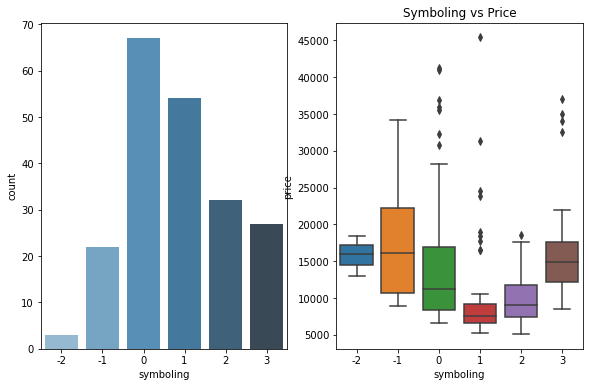

In [20]:
# Symboling represent insurance risk rating (+3 represent higher risk and -3 represent safe)

plt.figure(figsize=(15,6))
plt.subplot(1,3,1)
sns.countplot(df.symboling,palette=("Blues_d"))

plt.subplot(1,3,2)
plt.title("Symboling vs Price")
sns.boxplot(x=df.symboling,y=df.price)

plt.show()


1. Above plot shows symboling 0 and 1 type car have high selling rates.
2. Above plot shows symboling 3 also have higher priced too. 

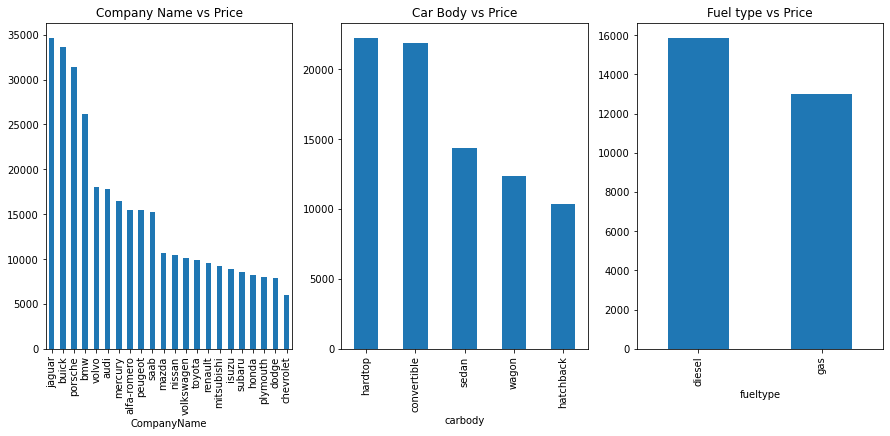

In [21]:
plt.figure(figsize=(15,6))
plt.subplot(1,3,1)
df1 = df.groupby(["CompanyName"])["price"].mean().sort_values(ascending=False)
df1.plot.bar()
plt.title("Company Name vs Price")

plt.subplot(1,3,2)
df1 = df.groupby(["carbody"])["price"].mean().sort_values(ascending=False)
df1.plot.bar()
plt.title("Car Body vs Price")

plt.subplot(1,3,3)
df1 = df.groupby(["fueltype"])["price"].mean().sort_values(ascending=False)
df1.plot.bar()
plt.title("Fuel type vs Price")
plt.show()

1. Jaguar and buick company have high Average Priced car.
2. Hardtop and convertible carbody type have high Average price.
3. Diesel fuel type car is costier than gas

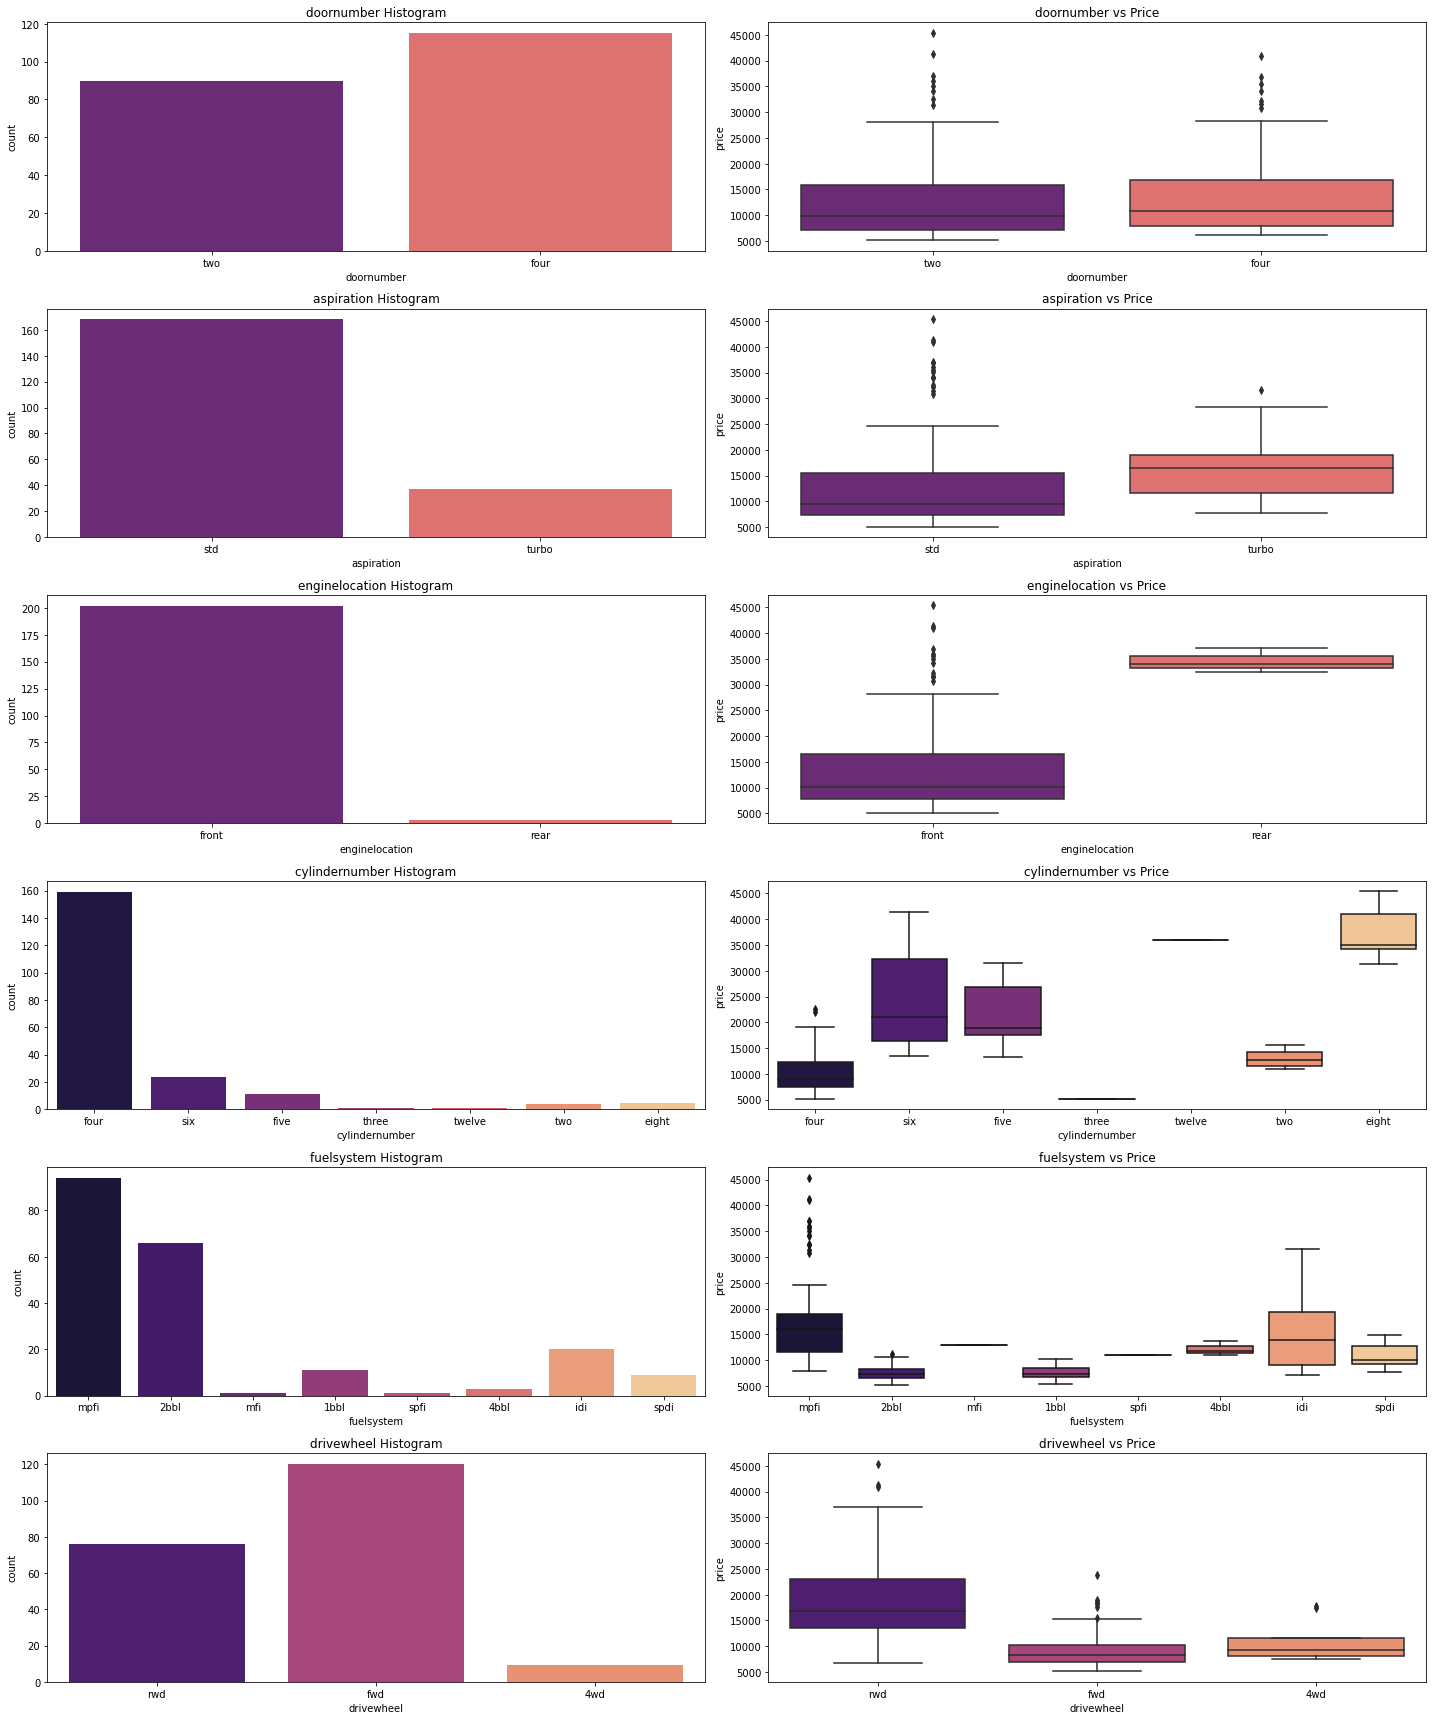

In [22]:
def plot_count(x,fig):
    plt.subplot(6,2,fig)
    plt.title(x+' Histogram')
    sns.countplot(df[x],palette=("magma"))
    plt.subplot(6,2,(fig+1))
    plt.title(x+' vs Price')
    sns.boxplot(x=df[x], y=df.price, palette=("magma"))
    
plt.figure(figsize=(20,24))

plot_count('doornumber', 1)
plot_count('aspiration', 3)
plot_count('enginelocation', 5)
plot_count('cylindernumber', 7)
plot_count('fuelsystem', 9)
plot_count('drivewheel', 11)


plt.tight_layout()

1. Four doors type car is most popular and two doors typr car have high average prices.
2. Std aspiration type is most popular and have high average prices.
3. Engine location in front is most popular and have high average prices.
4. Four cylinders type engine is most popular and eight cylinders type engine have high average prices.
5. mpfi and 2bbl are most common type of fuel systems. mpfi and idi having the highest price range.
6. A very significant difference in drivewheel category. Most high ranged cars seeme to prefer rwd drivewheel.

In [23]:
df.columns

Index(['car_ID', 'symboling', 'CompanyName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [24]:
# Build the ML Model

In [25]:
#Drop unnecessary columns
df1 = df.drop(["car_ID","CompanyName","symboling"],axis=1)

In [26]:
df1.head()
df1.columns

Index(['fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel',
       'enginelocation', 'wheelbase', 'carlength', 'carwidth', 'carheight',
       'curbweight', 'enginetype', 'cylindernumber', 'enginesize',
       'fuelsystem', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')

In [27]:
df['drivewheel'].value_counts()

fwd    120
rwd     76
4wd      9
Name: drivewheel, dtype: int64

In [28]:
# Encoding the categorical value
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
#y = le.fit_transform(y)

In [29]:
columns = ("fueltype","aspiration","doornumber","carbody","drivewheel","enginelocation","enginetype","cylindernumber","fuelsystem")

In [30]:
for i in columns:
    df1[i] = le.fit_transform(df1[i])

In [31]:
df1.head(3)

,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,0,1,0,2,0,88.6,168.8,64.1,48.8,...,130,5,3.47,2.68,9.0,111,5000,21,27,13495.0
1,1,0,1,0,2,0,88.6,168.8,64.1,48.8,...,130,5,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,0,1,2,2,0,94.5,171.2,65.5,52.4,...,152,5,2.68,3.47,9.0,154,5000,19,26,16500.0


In [32]:
X = df1.iloc[:, :-1].values
y = df1.iloc[:, -1].values

In [33]:
#train the dataset and split into training and test set
from sklearn.model_selection import  train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=1)

In [36]:
#Applying Random forest Regressor
from sklearn.ensemble import RandomForestRegressor
RFregressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
RFregressor.fit(X_train, y_train)

RandomForestRegressor(n_estimators=10, random_state=0)

In [47]:
from sklearn.metrics import r2_score,mean_squared_error
y_pred = RFregressor.predict(X_test)
r2 = r2_score(y_test, y_pred)
print("R squared: {}".format(r2))

R squared: 0.910446360662491
